# Oficina 2 - Análise do dataset de filmes 
---
### Discente: Lucas Matias Silva
---

# Introdução e Objetivo

**Vamos analisar de forma descritiva um conjunto de dados contendo dados de filmes lançados no período de 2007 e 2011**

**Nosso objetivo é obter informações do dataset através da construção de visualizações e responder algumas perguntas com essas informações**

## 0.0 -  Importamos as bibliotecas 

In [56]:
# Importando bibliotecas
import pandas as pd # importando biblioteca para manipular dados
import matplotlib.pyplot as plt # importando biblioteca para criar e manipular gráficos
import seaborn as sns # importando biblioteca para manipular gráficos
%matplotlib inline # Comando mágico para configurar o notebook em exibir imagens geradas pela matplot e por suas derivadas

## 0.1 - Importamos os dados e mostrando as 5 primeiras linhas**

In [5]:
# carregando pelo pasta
df_filmes = pd.read_json('movies.json')
df_filmes.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


In [6]:
# carregando pelo link
link_filmes = 'https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro03/oficina/arquivos/dadosoficina03.txt'
df_filmes = pd.read_json(link_filmes)
df_filmes.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


## 1.0 - Análise Descritiva

### 1.1 -  Analisando dados informativos do DataFrame

In [10]:
# Checando informações do dataframe e do conjunto de dados de forma mais resumida e não estatística
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Film               30 non-null     object
 1   Year               30 non-null     int64 
 2   Genre              30 non-null     object
 3   Worldwide_Gross_M  30 non-null     int64 
 4   Budget_M           30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [12]:
# Checando informações estatísticas da features com dados do tipo numérico do dataframe
df_filmes.describe()

,Year,Worldwide_Gross_M,Budget_M
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


## 2.0 - Respondendo perguntas

### 2.1 - Visualizando orçamento de todos os filmes e definindo o filme de maior orçamento e o filme de menor orçamento

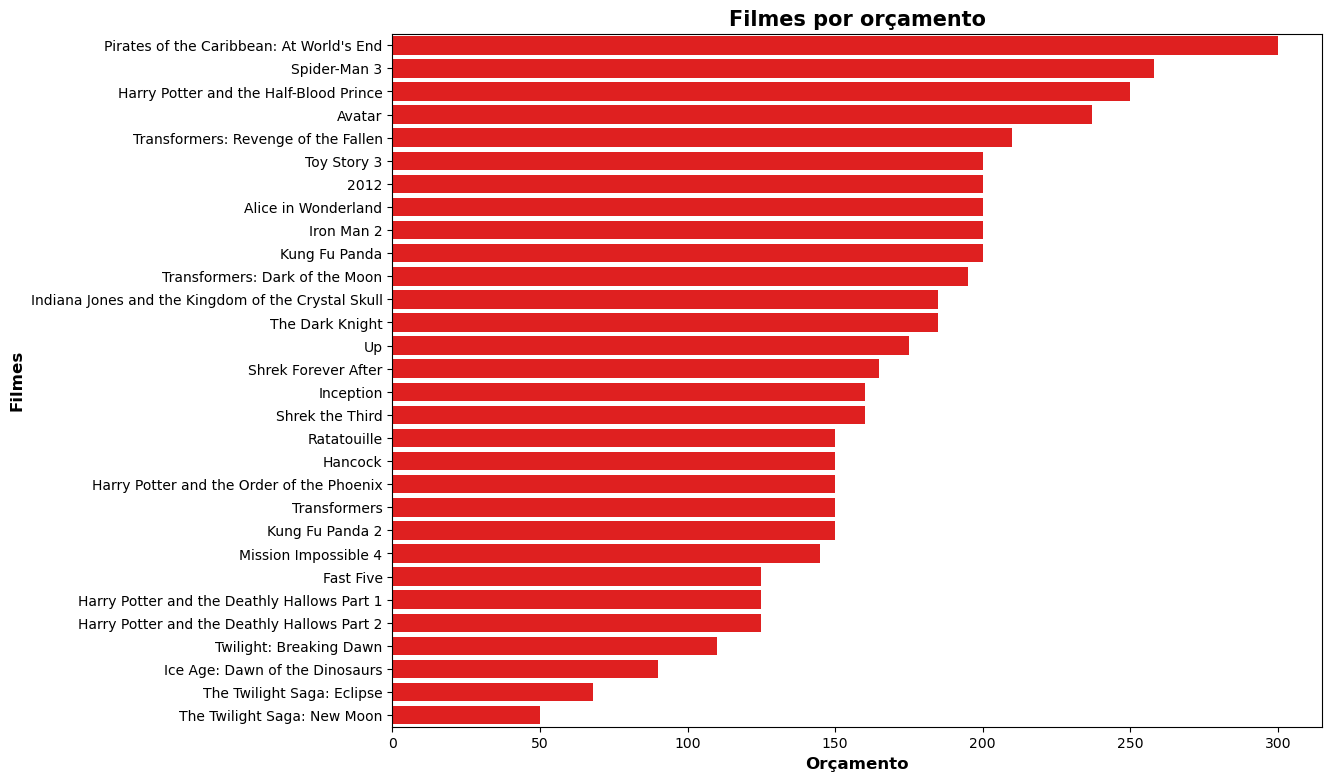

In [81]:
plt.figure(figsize=(12, 9)) # Definindo o comprimento da figura (12L,9A)(polegadas)

# Criamos um gráfico de barras horizontal com orçamento mapeado pelo comprimento de barras ordenas de forma decrescente
# Definimos no eixo das ordenas(y) a categoria com o título dos filmes
# Definimos no eixo das abssissas(x) os valores de orçamento
# Definimos a cor vermelha como padrão
# Obtemos o dataframe com dados ordenado de forma decrescente em relação aos valore de orçamento
sns.barplot(y='Film', x='Budget_M' , color='red', data = df_filmes.sort_values(by='Budget_M', ascending=False))

# Definindo nomenclaturas, estilo de fonte e tamanho dos eixos e do título do gráfico
plt.title('Filmes por orçamento', fontweight='bold', fontsize=15 )
plt.ylabel('Filmes', fontweight='bold', fontsize=12)
plt.xlabel('Orçamento', fontweight='bold', fontsize=12)

# Mostrando gráfico gerado
plt.show() 


**Análise**

Chegamos a conclusão o filme de maior orçamento é "Pirates of the Caribbean: At World's End" e o de menor orçamento é "The Twilight Saga: New Moon"

*Optamos por usar o gráfico de barras horizontal para evitar sobrepor o título dos filmes e para melhorar a comparação dos dados representados pelo comprimento das barras*

---

### 2.2 - Visualização com bilheteria de todos os filmes do conjunto de dados. Encontrar filme com maior bilheteria e com menor bilheteria.

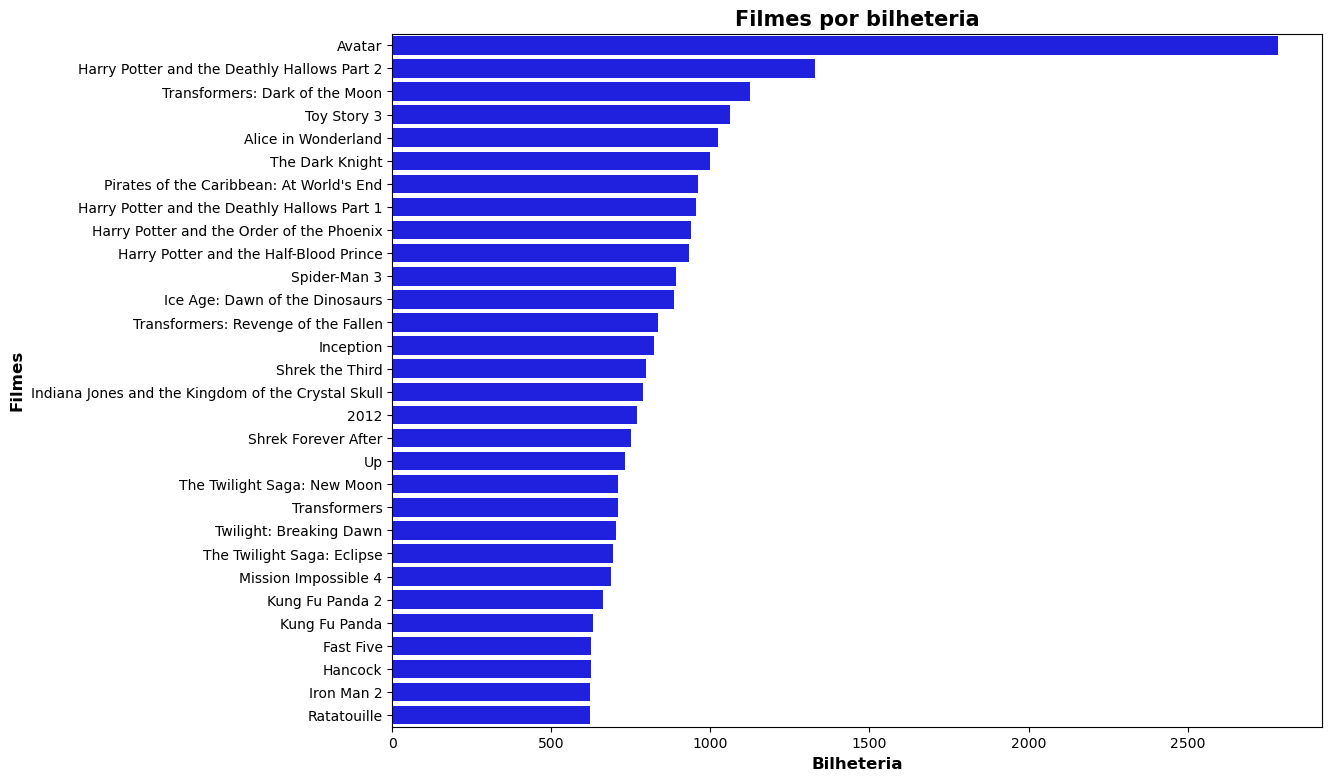

In [96]:
plt.figure(figsize=(12, 9)) 

sns.barplot(y='Film', x='Worldwide_Gross_M' , color='blue', data = df_filmes.sort_values(by='Worldwide_Gross_M', ascending=False))

plt.title('Filmes por bilheteria', fontweight='bold', fontsize=15 )
plt.ylabel('Filmes', fontweight='bold', fontsize=12)
plt.xlabel('Bilheteria', fontweight='bold', fontsize=12)

plt.show() 


**Análise**

O filme de maior bilheteria é Avatar e o filme de menor orçamento é Ratatouille

---

### 2.3 - Visualização que mostra a quantidade de filmes por gênero em cada ano. Em que anos foram feitos menos filmes de ação? E em que ano foram feitos menos filmes de animação?

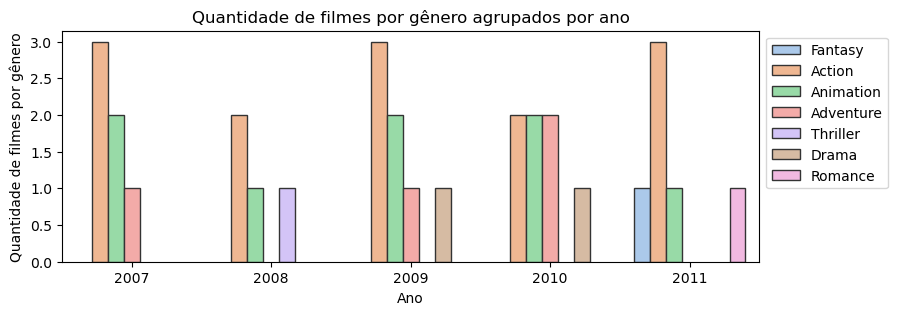

In [115]:
plt.figure(figsize=(9,3))

sns.countplot(x='Year', hue='Genre',palette = "pastel", edgecolor="0.2", data=df_filmes)

plt.title('Quantidade de filmes por gênero agrupados por ano')

plt.legend(bbox_to_anchor=(1,1), loc=2) # Ajustando a legenda para o lado de fora do gráfico
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes por gênero')
plt.show()

**Análise**

Podemos observar que o filmes de ação tomam sempre a ponta em quantidade de lançamento em todos os 5 anos, tendo menos destaque apenas em 2008, onde foram lançados apenas 2 filmes do gênero

Já nos filmes de animação, o ano mais fraco em quantidade de lançamento foi 2008 e 2011, ambos com apenas um lançamento

---

### 2.4 - Crie uma visualização que mostre a média de orçamento de filmes por gênero em cada ano. Em que ano os filmes de ação tiveram maior média de orçamento? E em que ano os filmes de animação tiveram a maior média de orçamento?

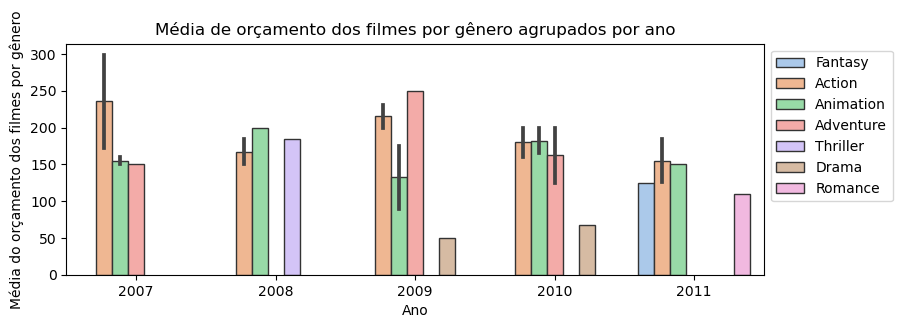

In [126]:
plt.figure(figsize=(9,3))

sns.barplot(x='Year', y='Budget_M', hue='Genre',palette = "pastel", edgecolor="0.2", ci='sd', data=df_filmes)

plt.title('Média de orçamento dos filmes por gênero agrupados por ano')
plt.legend(bbox_to_anchor=(1,1), loc=2) # Ajustando a legenda para o lado de fora do gráfico
plt.xlabel('Ano')
plt.ylabel('Média do orçamento dos filmes por gênero')
plt.show()

**Análise**

Os filmes de ação tiveram maior média de orçamento no ano de 2007. Tendo também, em média, uma maior variação nas despesas em relação ao gênero e aos demais gênero em todos os outros anos.

Os filmes de animação tiveram a maior média de orçamento no ano de 2008. Como só teve 1 filme nesse ano, não ouve variação de média. 